# MountainHub API Wrapper

In [1]:
%matplotlib inline

from datetime import datetime
import pandas as pd

from validation import MountainHub, Elevation, creds

## Basic Usage
Basic usage of the API wrapper is demonstrated below. The following optional parameters may also be specified to fetch within a certain time range or area, and to limit the number of results. Data is returned as a pandas dataframe.

- limit: int (default: 1000)
- start: datetime (default: None),
- end: datetime (default: None,
- box: dict of coordinates (default: None)

In [8]:
# Basic usage
obs = MountainHub.snow_data(limit=10)
obs

,author_name,id,timestamp,date,lat,long,type,snow_depth
0,Karsten von Hoesslin,5e3c8cda2646bf6f0a9887ab,1581026436629,2020-02-06 14:00:36.629,50.398795,-119.055334,snow_conditions,135.000000
1,Nikki Horrocks,5e3c834f92134473d7040b6b,1581023991366,2020-02-06 13:19:51.366,37.483015,-106.796646,snow_conditions,113.000000
2,Aidan Goldie,5e3c70aa92134473d703e9d7,1581019217555,2020-02-06 12:00:17.555,39.642799,-106.518115,snow_conditions,35.000000
3,Kate,5e3c88c592134473d7040ec7,1581014199662,2020-02-06 10:36:39.662,5.404931,-13.332444,snow_conditions,63.000000
4,Karsten von Hoesslin,5e3c8b132646bf6f0a9881a6,1580942521005,2020-02-05 14:42:01.005,50.368768,-119.064283,snow_conditions,210.000000
5,Bob Sutherland,5e3b2a091981f869f67902e5,1580930578015,2020-02-05 11:22:58.015,48.604521,-120.371946,snow_conditions,60.999998
6,Bob Sutherland,5e39e3bffaf5054e53922be9,1580852139907,2020-02-04 13:35:39.907,48.603228,-120.272607,snow_conditions,74.999997
7,Joseph Sirois,5e3c4c0f2646bf6f0a97fa07,1580848033830,2020-02-04 12:27:13.830,44.257764,-71.254156,snow_conditions,30.000000
8,Joseph Sirois,5e3c4c1292134473d70370c9,1580847897187,2020-02-04 12:24:57.187,44.257776,-71.254776,snow_conditions,34.000000
9,Joseph Sirois,5e3c4bcd6dbf9611197dfc75,1580847428118,2020-02-04 12:17:08.118,44.258471,-71.254005,snow_conditions,36.000000


In [9]:
MountainHub.snow_data?

Signature:
MountainHub.snow_data(
    publisher='all',
    obs_type='snow_conditions',
    limit=100,
    start=None,
    end=None,
    box=None,
    filter=True,
)
Docstring:
Retrieves snow data from MountainHub API.

Keyword arguments:
publisher --
obs_type --
limit -- Maximum number of records to return (default 100)
start -- Start date to return results from
end -- End date to return results from
box -- Bounding box to restrict results,
filter -- Flag indicating whether entries with no snow depth data should be filtered out
File:      /usr/mayorgadat/workmain/aarendt/CSO/gh_org/validation/validation/MountainHub.py
Type:      function


In [28]:
# obs2 = MountainHub.snow_data(obs_type='snow_conditions,snowpack_test', 
obs2 = MountainHub.snow_data(obs_type='snow_conditions', 
                             limit=500, start=datetime(2020,1,10), end=datetime(2020,1,20))

In [29]:
len(obs2)

65

In [30]:
obs2.head(10)

,author_name,id,timestamp,date,lat,long,type,snow_depth
0,Annalise decker,5e24eb991a335767a8fe5441,1579472430680,2020-01-19 14:20:30.680,37.766288,-119.777359,snow_conditions,75.000000
1,Mikey Johnson,5e24bd3c27fc5939ff389f60,1579465962600,2020-01-19 12:32:42.600,39.294956,-119.925711,snow_conditions,110.000000
2,Ben Clark,5e24da9e1a335767a8fe3f3a,1579465101647,2020-01-19 12:18:21.647,57.080782,-135.311660,snow_conditions,95.000000
3,Nina Aragon,5e28e43453c44435fa187cd2,1579463675509,2020-01-19 11:54:35.509,43.946934,-121.661477,snow_conditions,116.000000
4,Benjamin Hatchett,5e2f914bf1293c5358e3bd2f,1579454850686,2020-01-19 09:27:30.686,39.199390,-120.242294,snow_conditions,52.000000
5,Elizabeth Kimberly,5e238dd85511bc4a2bf650c7,1579388300678,2020-01-18 14:58:20.678,48.866192,-121.680288,snow_conditions,310.000000
6,Danny Martin,5e2388a3a32f3578a00bd2d7,1579387024878,2020-01-18 14:37:04.878,43.589098,-110.732537,snow_conditions,68.999997
7,Julie Carpenter,5e2645437dfd902d54ee67e9,1579385432101,2020-01-18 14:10:32.101,63.864960,-149.738793,snow_conditions,35.000000
9,Karsten von Hoesslin,5e2370f3a32f3578a00b8da2,1579380959019,2020-01-18 12:55:59.019,50.398735,-119.055178,snow_conditions,115.000000
10,Benjamin Hatchett,5e23ce1227fc5939ff365e73,1579369394755,2020-01-18 09:43:14.755,38.934233,-120.073469,snow_conditions,50.000000


In [31]:
obs2.author_name.value_counts()

Karsten von Hoesslin    7
JD                      5
Erin Mckittrick         5
DKS                     3
Andrew Morphis          3
Bob Sutherland          3
Nicholas Lowing         3
Elizabeth Kimberly      3
Ryan Crumley            3
Mikey Johnson           2
Julie Carpenter         2
John Serkowski          2
David Hill              2
Benjamin Hatchett       2
Max sawyer              2
Colin R. Meyer          1
Patrick St.Onge         1
Mike Dawson             1
Nina Aragon             1
Aaron Hartz             1
Ben Clark               1
Brint Markle            1
Angie Fuhrmann          1
Annalise decker         1
Genevieve               1
Gabriel Wolken          1
Taylor Pfaff            1
Danny Martin            1
NB                      1
Joseph Kurtak           1
Yasmine Hentati         1
Bart Wills              1
Connor Way              1
Name: author_name, dtype: int64

In [32]:
obs2[obs2.author_name == 'David Hill']

,author_name,id,timestamp,date,lat,long,type,snow_depth
29,David Hill,5e1f643c4fdb45291ad8e475,1579115548348,2020-01-15 11:12:28.348,44.401894,-121.882523,snow_conditions,165.10
33,David Hill,5e1e83224fdb45291ad73d0f,1579057938302,2020-01-14 19:12:18.302,44.631752,-123.349048,snow_conditions,20.32


## Usage with additional parameters
Usage of additional parameters is demonstrated below. The box paramter takes a dictionary with structure displayed below. 

# Search Area
region = {
    'ymax' : 45,
    'ymin' : 44,
    'xmax': -121,
    'xmin': -122,
}

obs = MountainHub.snow_data(limit=10, start=datetime(2017,8,1), end=datetime(2018,10,1), box=region)
display(obs)

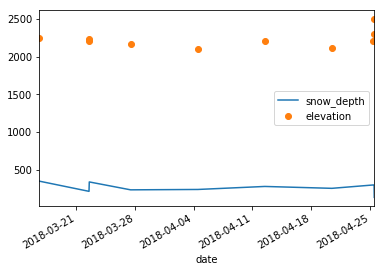

In [13]:
plt = obs.plot(x='date', y='snow_depth')
obs.plot(x='date', y='elevation', style='o', ax=plt)